In [1]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [2]:
cosine_similarity([[3,1]], [[6,2]])

array([[1.]])

In [ ]:
cosine_distances([[3,1]], [[6,2]])

array([[1.11022302e-16]])

In [ ]:
cosine_similarity([[3,1]], [[3,2]])

array([[0.96476382]])

In [ ]:
import pandas as pd
df = pd.DataFrame([
            {'iphone': 3, 'galaxy': 1},
            {'iphone': 2, 'galaxy': 0},
            {'iphone': 1, 'galaxy': 3},
            {'iphone': 1, 'galaxy': 2}
        ],
        index = [
            "doc1",
            "doc2",
            "doc3",
            "doc4"
        ]
)
df

,iphone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [ ]:
df.loc["doc1": "doc1"]

,iphone,galaxy
doc1,3,1


In [ ]:
cosine_similarity(df.loc["doc1": "doc1"], df.loc["doc2": "doc2"])

array([[0.9486833]])

In [ ]:
cosine_similarity(df.loc["doc1": "doc1"], df.loc["doc3": "doc3"])

array([[0.6]])

In [ ]:
cosine_similarity(df.loc["doc3": "doc3"], df.loc["doc4": "doc4"])

array([[0.98994949]])

In [1]:
import tensorflow as tf

2025-02-02 07:26:58.834449: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

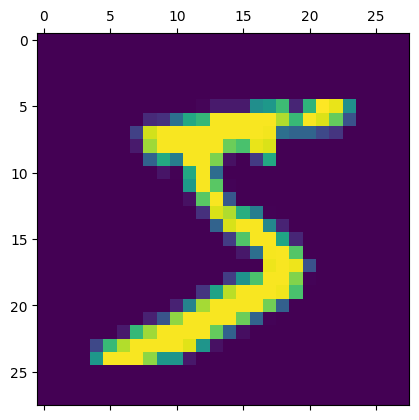

In [8]:
plt.matshow(X_train[0])

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2025-02-02 07:56:23.665601: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 753us/step - accuracy: 0.8109 - loss: 0.7242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.9133 - loss: 0.3100
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.9201 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.9264 - loss: 0.2658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step - accuracy: 0.9262 - loss: 0.2649


In [21]:
model.evaluate(X_test_flattened, y_test)

171/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9128 - loss: 0.3163

2025-02-02 07:56:40.359889: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9163 - loss: 0.3043


[0.26761946082115173, 0.9264000058174133]

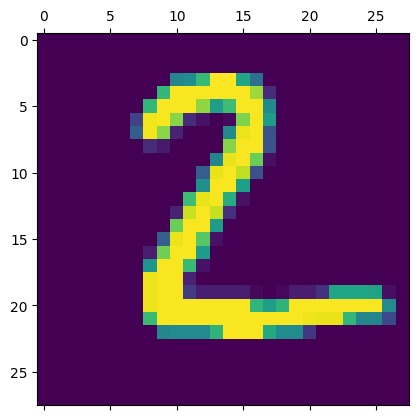

In [25]:
plt.matshow(X_test[1])

In [26]:
y_predicated = model.predict(X_test_flattened)
y_predicated[1]

239/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step

2025-02-02 07:57:53.002888: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


array([2.55871743e-01, 5.65787079e-03, 9.99136209e-01, 3.10477763e-01,
       3.86704363e-10, 8.12709212e-01, 9.01382446e-01, 7.69525936e-13,
       1.17840305e-01, 1.63321801e-09], dtype=float32)

In [27]:
np.argmax(y_predicated[1])

2

In [28]:
y_predicated_labels = [np.argmax(i) for i in y_predicated]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicated_labels)

Text(95.72222222222221, 0.5, 'Truth')

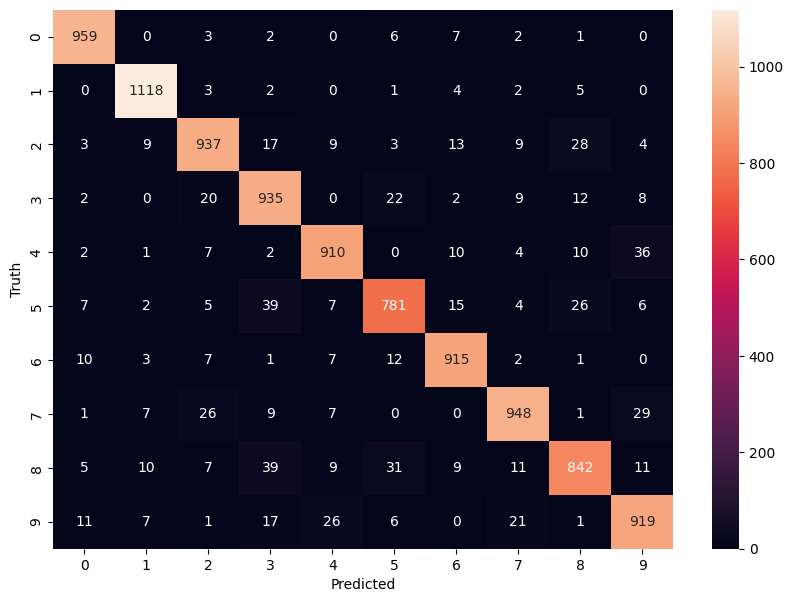

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

/home/codespace/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8683 - loss: 0.4680
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9596 - loss: 0.1352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9742 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9811 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9852 - loss: 0.0489


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9723 - loss: 0.0853


[0.07451727986335754, 0.9757000207901001]

Text(95.72222222222221, 0.5, 'Truth')

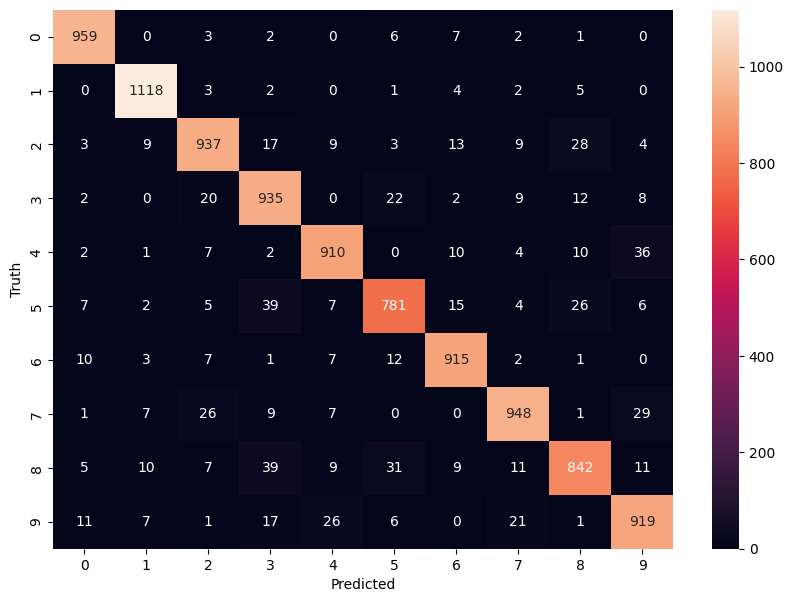

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
50 / 12

4.166666666666667